<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        BIODIVERSITY  OBSERVATIONS ANALYSIS
    </h1>
    </div>

<h2 align="center"><font color=#2067d4> Exploratory Data Analysis (EDA) Project</font></h2> 

---
    
<p align="center"><font color=#2067d4>
  Amarja Kumbhar and Sameehan Shastrabuddhe
   </font>
</p>
 <a href="https://github.com/AmarjaKumbhar1505/Advance_Python_Programming">GitHub</a> 


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=dodgerblue> 🎯 Project Description:</font></h3>   

- In this project, we will perform basic Exploratory Data Analysis (EDA) on the Biodiversity Observations
- we will visualize Data using Seaborn and Matplotlib. 
- Analysis of biodiversity data from 100,000 observations across multiple species and regions..
    
<h3 align="left"><font color=dodgerblue> 📝 About the Datasets </font></h3>     
    
**Dataset Descriptions:** 'dataset_5.csv'. 

- **Content:** The dataset contains 50 columns, each representing different aspects of species observations.
- **Rows:** 10000    
- **Columns:** 5 
    - **Date:** Date of the recorded stock price and returns.
    - **AAPL**: Daily return for Apple Inc.
    - **JPM**: Daily return for JPMorgan Chase & Co.
    - **PG**: Daily return for Procter & Gamble Co.
    - **UAL**: Daily return for United Airlines Holdings, Inc.
 
- **Purpose:** These datasets Provide a comprehensive view of stock price movements over time for analysis of trends, patterns, and correlations.
 
---


## <font color=#2865c8> <b> UNDERSTANDING THE DATA </b><font color='orange'>

### <font color='dodgerblue'> <b> Import The Libraries</b><font color='orange'>

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

  
# Enable inline plotting
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [86]:
#Import the “dataset_5.csv" file using Pandas

file_path = 'dataset_5.csv'
data = pd.read_csv(file_path)

### <font color='dodgerblue'> <b> Performing Essential Statistical Analysis on the Dataset </b><font color='orange'>

#### <font color='orange'> <b> 1. Basic information about the dataset </b><font color='orange'>

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   gbifID                            100000 non-null  int64  
 1   datasetKey                        100000 non-null  object 
 2   occurrenceID                      99998 non-null   object 
 3   kingdom                           100000 non-null  object 
 4   phylum                            99979 non-null   object 
 5   class                             98684 non-null   object 
 6   order                             96822 non-null   object 
 7   family                            99936 non-null   object 
 8   genus                             99909 non-null   object 
 9   species                           98735 non-null   object 
 10  infraspecificEpithet              3269 non-null    object 
 11  taxonRank                         100000 non-null  ob

 #### <font color='orange'> <b> 2. First 5 rows of the dataset </b><font color='orange'>

In [88]:
data.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3005127375,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/42269260,Plantae,Tracheophyta,Liliopsida,Asparagales,Asparagaceae,Maianthemum,Maianthemum canadense,NaN,SPECIES,Maianthemum canadense Desf.,Maianthemum canadense,NaN,US,NaN,New York,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,40.749279,-73.150795,75.0,NaN,NaN,NaN,NaN,NaN,2020-04-15T13:13:04,15,4,2020,2769544,2769544.0,HUMAN_OBSERVATION,iNaturalist,Observations,42269260,NaN,Sequoia Janirella Wrens,2020-04-15T21:54:35,CC0_1_0,Sequoia Janirella Wrens,Sequoia Janirella Wrens,NaN,NaN,2023-09-21T13:49:00.714Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
1,2609120458,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/42487259,Plantae,Tracheophyta,Magnoliopsida,Geraniales,Geraniaceae,Geranium,Geranium sanguineum,NaN,SPECIES,Geranium sanguineum L.,Geranium sanguineum,NaN,RU,NaN,Belgorod,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,51.199074,37.639732,174.0,NaN,NaN,NaN,NaN,NaN,2010-06-18T11:32:00,18,6,2010,2890920,2890920.0,HUMAN_OBSERVATION,iNaturalist,Observations,42487259,NaN,svg52,2020-04-18T17:23:45,CC_BY_NC_4_0,Degtyarev Nikolai Ivanovich,Degtyarev Nikolai Ivanovich,NaN,NaN,2023-09-21T13:49:07.678Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
2,2609280234,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/42723454,Plantae,Tracheophyta,Magnoliopsida,Geraniales,Geraniaceae,Geranium,Geranium robertianum,NaN,SPECIES,Geranium robertianum L.,Geranium robertianum,NaN,US,NaN,Washington,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,45.681986,-122.538162,27126.0,NaN,NaN,NaN,NaN,NaN,2020-04-20T18:32:01,20,4,2020,2890668,2890668.0,HUMAN_OBSERVATION,iNaturalist,Observations,42723454,NaN,colby_ree,2020-04-21T01:32:52,CC_BY_NC_4_0,colby_ree,colby_ree,NaN,NaN,2023-09-21T13:49:15.426Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
3,2626475497,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/42979497,Animalia,Chordata,Squamata,NaN,Dactyloidae,Anolis,Anolis sagrei,NaN,SPECIES,"Anolis sagrei Duméril & Bibron, 1837",Anolis sagrei,NaN,US,NaN,Florida,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,27.766636,-82.640770,5.0,NaN,NaN,NaN,NaN,NaN,2020-04-23T14:54:34,23,4,2020,4287413,4287413.0,HUMAN_OBSERVATION,iNaturalist,Observations,42979497,NaN,Chris Thawley,2020-05-06T12:40:49,CC_BY_NC_4_0,roxanne_h,roxanne_h,NaN,NaN,2023-09-21T13:49:23.251Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
4,3468939364,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/43243876,Plantae,Bryophyta,Bryopsida,Orthotrichales,Orthotrichaceae,Ulota,Ulota hutchinsiae,NaN,SPECIES,Ulota hutchinsiae (Sm.) Hammar,Ulota hutchinsiae,NaN,US,NaN,Connecticut,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,41.438518,-72.062306,30.0,NaN,NaN,NaN,NaN,NaN,2020-04-23T15:03:00,23,4,2020,2671915,2671915.0,HUMAN_OBSERVATION,iNaturalist,Observations,43243876,NaN,MikeN,2020-04-25T02:52:10,CC_BY_NC_4_0,MikeN,MikeN,NaN,NaN,2023-09-21T13:49:30.641Z,StillImage;StillImage;StillImage;StillImage;St...,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


 #### <font color='orange'> <b> 3. Last 5 rows of the dataset </b><font color='orange'>

In [89]:
data.tail()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
99995,3747313788,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10907...,Animalia,Chordata,Aves,Anseriformes,Anatidae,Branta,Branta canadensis,NaN,SPECIES,"Branta canadensis (Linnaeus, 1758)",Branta canadensis,NaN,US,NaN,South Carolina,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,34.927711,-82.370941,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20T11:25:00,20,3,2022,5232437,5232437.0,HUMAN_OBSERVATION,iNaturalist,Observations,109078311,NaN,Norm Shea,2022-03-20T20:21:48,CC_BY_NC_4_0,cynthianwalsh,cynthianwalsh,NaN,NaN,2023-09-21T16:09:54.979Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
99996,3747207218,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10928...,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Plantaginaceae,Veronica,Veronica persica,NaN,SPECIES,Veronica persica Poir.,Veronica persica,NaN,FR,NaN,Rhône-Alpes,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,45.550235,4.715403,14.0,NaN,NaN,NaN,NaN,NaN,2022-03-23T14:34:27,23,3,2022,3172077,3172077.0,HUMAN_OBSERVATION,iNaturalist,Observations,109283377,NaN,sarahpripri,2022-03-23T13:40:41,CC_BY_NC_4_0,sarahpripri,sarahpripri,NaN,NaN,2023-09-21T16:10:02.129Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
99997,3858178969,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10951...,Plantae,Tracheophyta,Magnoliopsida,Gentianales,Apocynaceae,Funastrum,Funastrum cynanchoides,NaN,SPECIES,Funastrum cynanchoides (Decne.) Schltr.,Funastrum cynanchoides,NaN,US,NaN,Texas,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,28.057723,-97.876230,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-23T12:04:00,23,3,2022,3170225,3170225.0,HUMAN_OBSERVATION,iNaturalist,Observations,109513849,NaN,Michelle,2022-03-26T03:32:25,CC_BY_4_0,Michelle,Michelle,NaN,NaN,2023-09-21T16:10:09.991Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
99998,3759210218,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10974...,Animalia,Chordata,Aves,Cuculiformes,Cuculidae,Cacomantis,Cacomantis merulinus,NaN,SPECIES,"Cacomantis merulinus (Scopoli, 1786)",Cacomantis merulinus,NaN,TH,NaN,Pathum Thani,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,13.975490,100.777442,19746.0,NaN,NaN,NaN,NaN,NaN,2019-03-02T18:09:00,2,3,2019,2496253,2496253.0,HUMAN_OBSERVATION,iNaturalist,Observations,109745725,NaN,Sam Hambly,2022-03-28T11:46:55,CC_BY_NC_4_0,Sam Hambly,Sam Hambly,NaN,NaN,2023-09-21T16:10:17.784Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
99999,3759664498,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10998...,Plantae,Marchantiophyta,Jungermanniopsida,Porellales,Porellaceae,Porella,Porella navicularis,NaN,SPECIES,Porella navicularis (Lehm. & Lindenb.) Pfeiff.,Porella navicularis,NaN,CA,NaN,British Columbia,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,48.781114,-123.948869,35.0,NaN,NaN,NaN,NaN,NaN,2022-03-30T17:53:00,30,3,2022,8035419,8035419.0,HUMAN_OBSERVATION,iNaturalist,Observations,109986313,NaN,Steven Hayward,2022-03-31T05:38:12,CC_BY_NC_4_0,Steven Hayward,Steven Hayward,NaN,NaN,2023-09-21T16:10:24.639Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


 #### <font color='orange'> <b> 4. Statistical Description of the dataset </b><font color='orange'>

In [90]:
# Basic statistics summary of Numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gbifID,100000.0,3.313398e+09,7.872276e+08,8.910187e+08,2.826249e+09,3.415386e+09,3.986271e+09,4.414443e+09
verbatimScientificNameAuthorship,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locality,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
individualCount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
decimalLatitude,99764.0,3.123703e+01,2.511721e+01,-7.721700e+01,2.960094e+01,3.891282e+01,4.555395e+01,7.961915e+01
decimalLongitude,99764.0,-3.748069e+01,8.102680e+01,-1.798810e+02,-9.694332e+01,-7.623899e+01,1.424110e+01,1.794023e+02
coordinateUncertaintyInMeters,80678.0,5.771163e+03,8.957490e+04,1.000000e+00,8.000000e+00,3.100000e+01,2.640000e+02,1.365013e+07
coordinatePrecision,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevation,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevationAccuracy,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 #### <font color='orange'> <b> 5. Checking Duplicate Values in the dataset </b><font color='orange'>


In [91]:
# Check out the duplicated values!!!!!!!!
data_cleaned.duplicated().sum()
#Dropping Duplicate records
duplicated_rows = data_cleaned[data_cleaned.duplicated(keep=False)]
duplicated_rows

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,verbatimScientificName,countryCode,stateProvince,occurrenceStatus,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,lastInterpreted,mediaType,issue


 #### <font color='orange'> <b> 6. Checking Missing Values in the dataset </b><font color='orange'>


In [92]:
data.isnull().sum()

gbifID                                   0
datasetKey                               0
occurrenceID                             2
kingdom                                  0
phylum                                  21
class                                 1316
order                                 3178
family                                  64
genus                                   91
species                               1265
infraspecificEpithet                 96731
taxonRank                                0
scientificName                           0
verbatimScientificName                   0
verbatimScientificNameAuthorship    100000
countryCode                            317
locality                            100000
stateProvince                          501
occurrenceStatus                         0
individualCount                     100000
publishingOrgKey                         0
decimalLatitude                        236
decimalLongitude                       236
coordinateU

 #### <font color='orange'> <b> 7. Checking Missing Values Pencentage in the dataset </b><font color='orange'>

In [93]:
missing_count = data.isnull().sum()
value_count = data.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage":missing_percentage})
missing_df

,count,percentage
gbifID,0,0.00
datasetKey,0,0.00
occurrenceID,2,0.00
kingdom,0,0.00
phylum,21,0.02
class,1316,1.32
order,3178,3.18
family,64,0.06
genus,91,0.09
species,1265,1.26


In [94]:
#Finding Column with more than 80% missing value
columns_to_drop = missing_percentage[missing_percentage > 80].index

If a column has more than 80% missing values, it's often a good candidate for removal. This is because the column likely won't provide meaningful insights or data for analysis.

In [95]:
data_cleaned = data.drop(columns=columns_to_drop)

In [96]:
#New data after cleaning Missing data
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   gbifID                         100000 non-null  int64  
 1   datasetKey                     100000 non-null  object 
 2   occurrenceID                   99998 non-null   object 
 3   kingdom                        100000 non-null  object 
 4   phylum                         99979 non-null   object 
 5   class                          98684 non-null   object 
 6   order                          96822 non-null   object 
 7   family                         99936 non-null   object 
 8   genus                          99909 non-null   object 
 9   species                        98735 non-null   object 
 10  taxonRank                      100000 non-null  object 
 11  scientificName                 100000 non-null  object 
 12  verbatimScientificName         

In [97]:
# Basic statistics summary of Numerical features
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
gbifID,100000.0,3.313398e+09,7.872276e+08,8.910187e+08,2.826249e+09,3.415386e+09,3.986271e+09,4.414443e+09
decimalLatitude,99764.0,3.123703e+01,2.511721e+01,-7.721700e+01,2.960094e+01,3.891282e+01,4.555395e+01,7.961915e+01
decimalLongitude,99764.0,-3.748069e+01,8.102680e+01,-1.798810e+02,-9.694332e+01,-7.623899e+01,1.424110e+01,1.794023e+02
coordinateUncertaintyInMeters,80678.0,5.771163e+03,8.957490e+04,1.000000e+00,8.000000e+00,3.100000e+01,2.640000e+02,1.365013e+07
day,100000.0,1.583929e+01,8.957205e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.400000e+01,3.100000e+01
month,100000.0,6.394550e+00,2.773798e+00,1.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
year,100000.0,2.020273e+03,3.032960e+00,1.943000e+03,2.019000e+03,2.021000e+03,2.022000e+03,2.023000e+03
taxonKey,100000.0,4.264738e+06,2.456680e+06,2.374000e+03,2.481342e+06,3.101325e+06,5.371723e+06,1.237041e+07
speciesKey,98735.0,4.164651e+06,2.399212e+06,1.003567e+06,2.480863e+06,3.046258e+06,5.341175e+06,1.237041e+07
catalogNumber,100000.0,9.085488e+07,5.251089e+07,2.003000e+03,4.575099e+07,9.078688e+07,1.358756e+08,1.840368e+08


In [98]:
# Basic statistics summary of Object features
data_cleaned.describe(include= 'object').T

,count,unique,top,freq
datasetKey,100000,1,50c9509d-22c7-4a22-a47d-8c48425ef4a7,100000
occurrenceID,99998,99998,https://www.inaturalist.org/observations/10998...,1
kingdom,100000,7,Animalia,58249
phylum,99979,33,Tracheophyta,38347
class,98684,105,Magnoliopsida,30809
order,96822,481,Lepidoptera,11441
family,99936,2182,Asteraceae,4615
genus,99909,11997,Anas,613
species,98735,26539,Anas platyrhynchos,428
taxonRank,100000,6,SPECIES,95466


<a id='data-visualisation'></a>
## <font color=#20a0ff> <b> Data Visualisation </b><font color='orange'>

<a id='categorical-features'></a>
## Categorical Features

<a id='dist-categorical'></a>
###  Distribution of Categorical Features

In [99]:
# Let's observe unique values 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [100]:
get_unique_values(data_cleaned)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,gbifID,100000,-,int64
1,datasetKey,1,[50c9509d-22c7-4a22-a47d-8c48425ef4a7],object
2,occurrenceID,99998,-,object
3,kingdom,7,"[Plantae, Animalia, Fungi, Protozoa, Chromista...",object
4,phylum,33,-,object
5,class,105,-,object
6,order,481,-,object
7,family,2182,-,object
8,genus,11997,-,object
9,species,26539,-,object


In [101]:
import plotly.graph_objects as go
import plotly.express as px

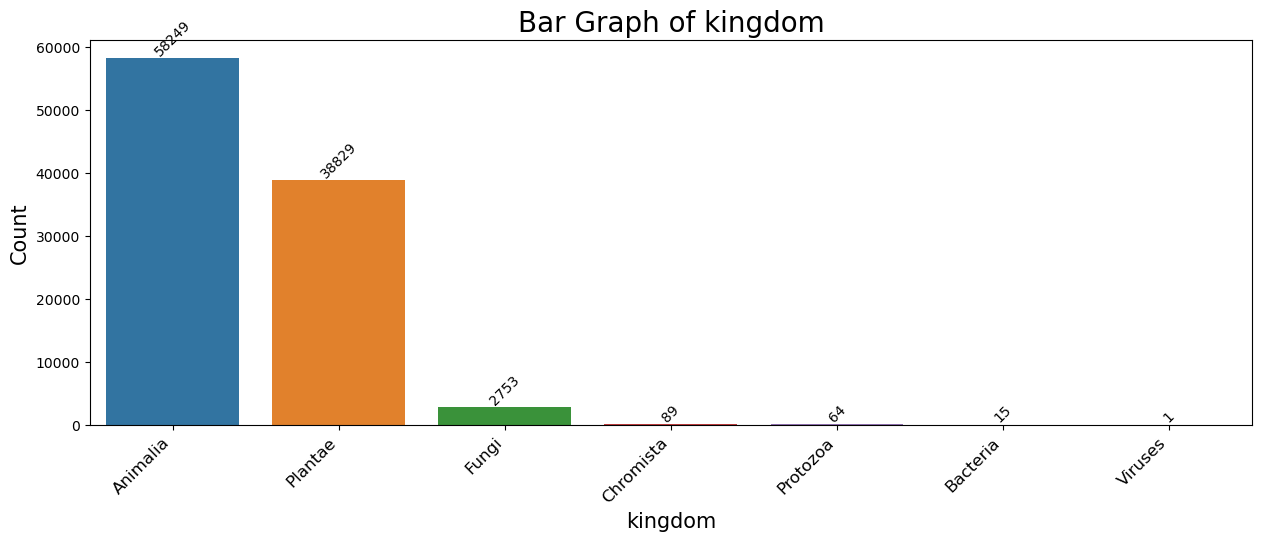

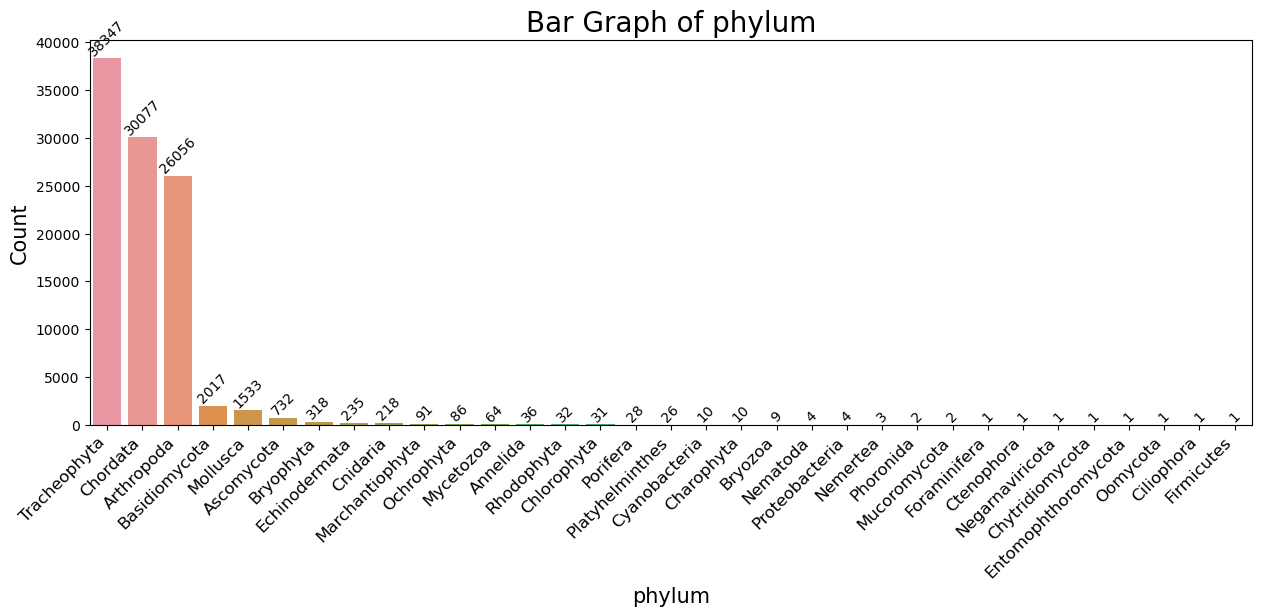

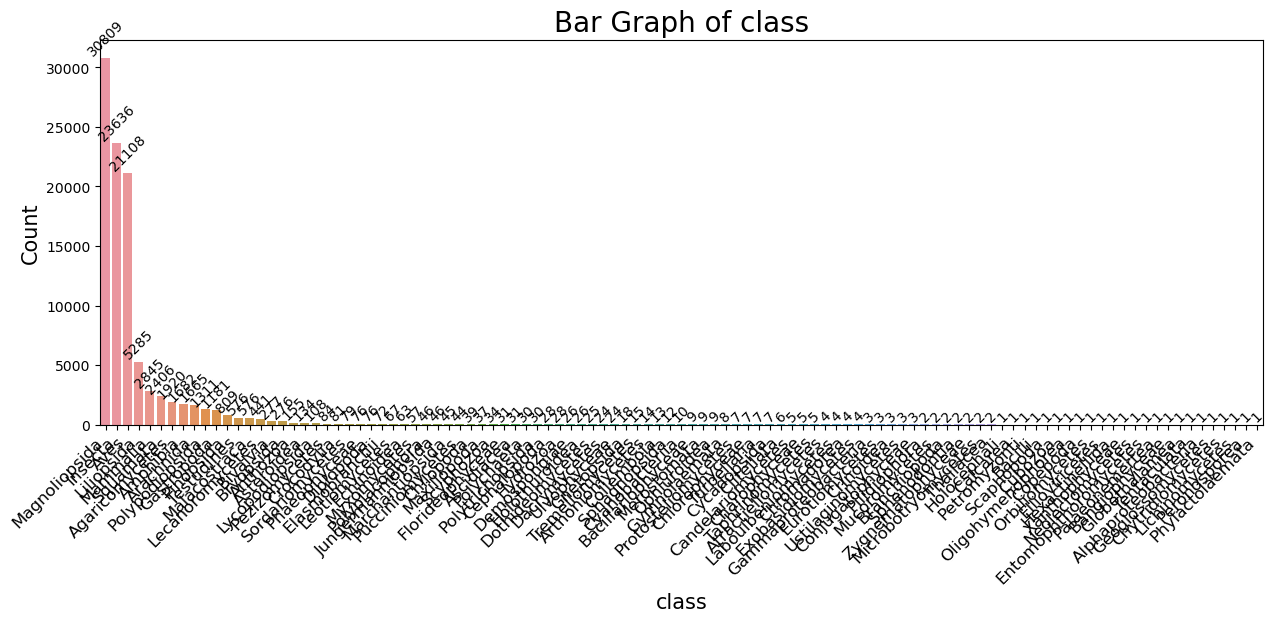

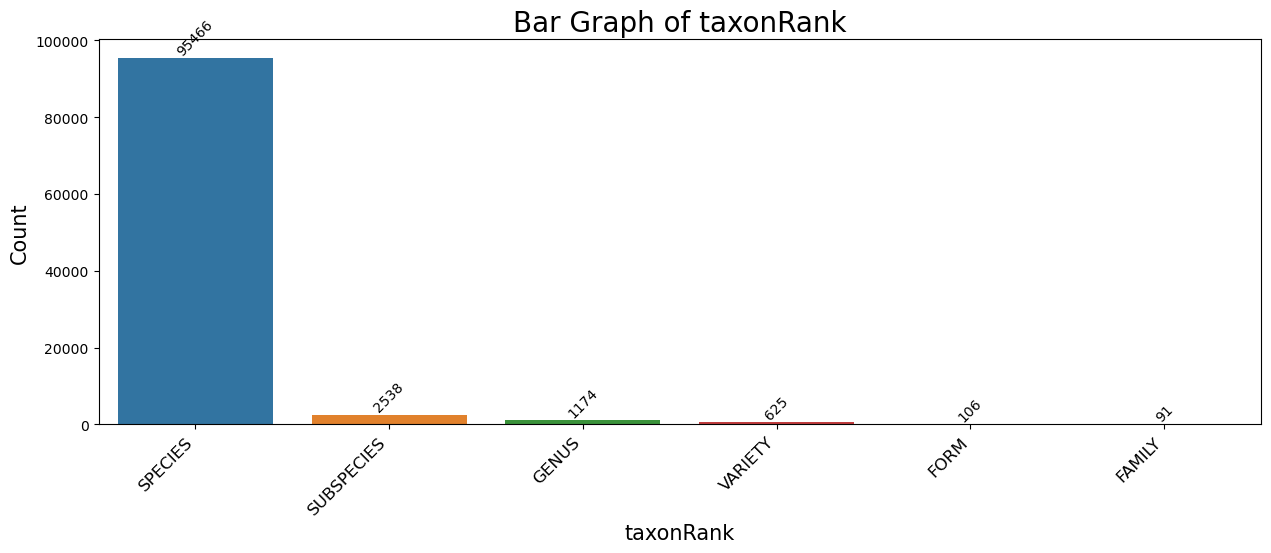

In [102]:
# Let's look at the distribution of our categorical characteristics with a bar graph

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
cat_features = ['kingdom','phylum', 'class',  'taxonRank']

plot_bar_graphs(data_cleaned, cat_features)

<a id='numerical-features'></a>
## Numerical Features


<a id='dist-numerical'></a>
### Distribution of Numerical Features

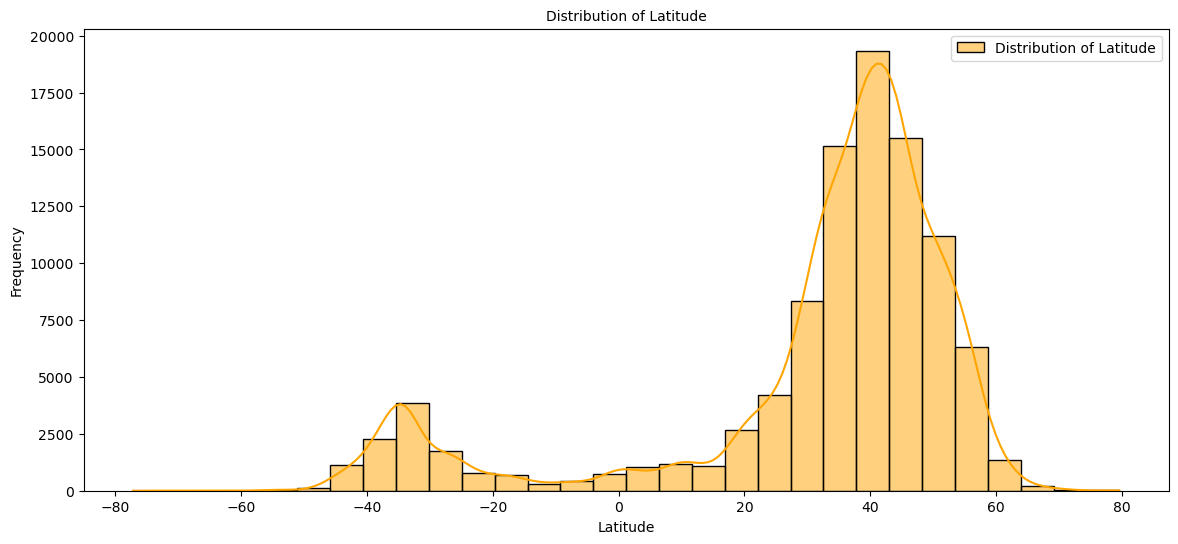

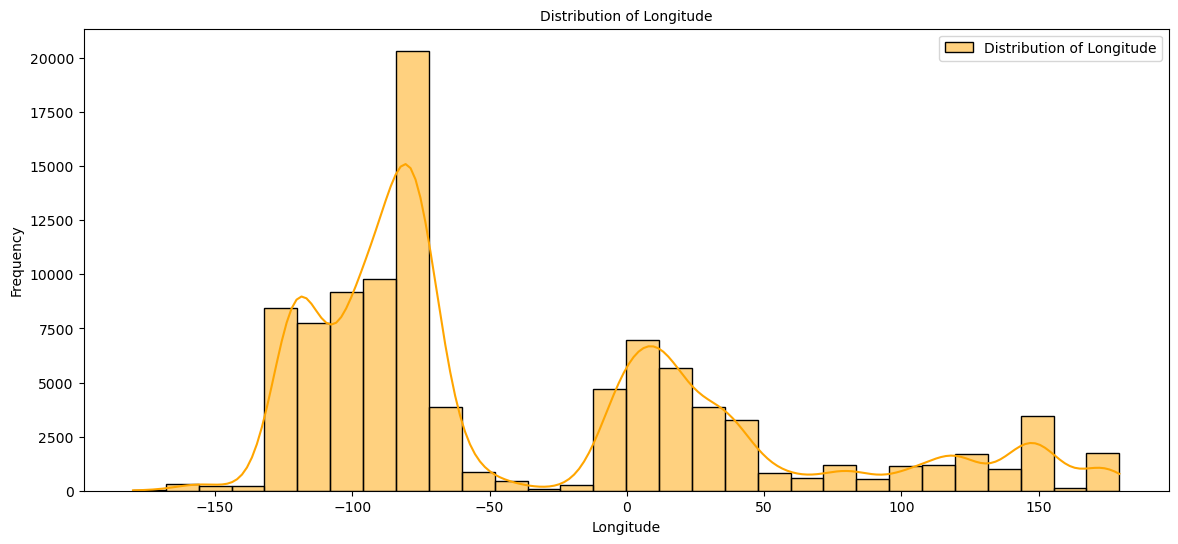

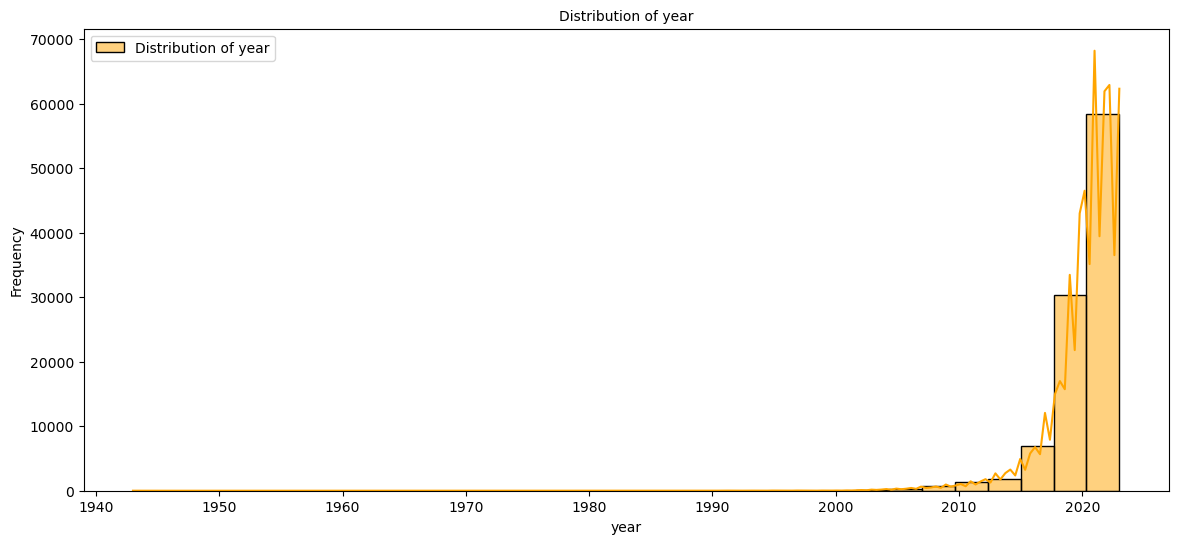

In [116]:
# Distribution of latitude and longitude
plt.figure(figsize=(14, 6))

sns.histplot(data=data_cleaned, x='decimalLatitude', kde=True, bins=30,label = "Distribution of Latitude",color = "orange")
plt.title('Distribution of Latitude',fontsize=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.show()



plt.figure(figsize=(14, 6))

sns.histplot(data=data_cleaned, x='decimalLongitude', kde=True, bins=30,label = "Distribution of Longitude",color = "orange")
plt.title('Distribution of Longitude',fontsize=10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))

sns.histplot(data=data_cleaned, x='year', kde=True,bins=30,label = "Distribution of year",color = "orange")
plt.title('Distribution of Observations Over Time',fontsize=10)
plt.xlabel('year', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.show()


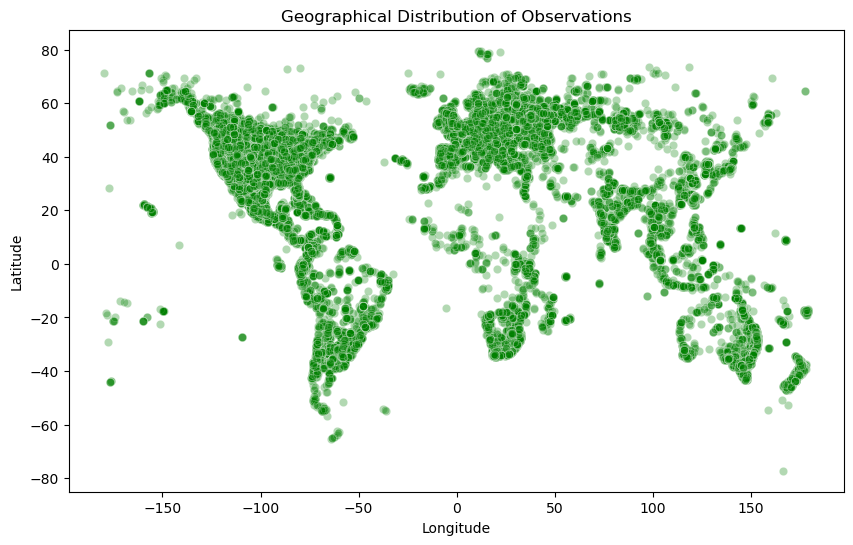

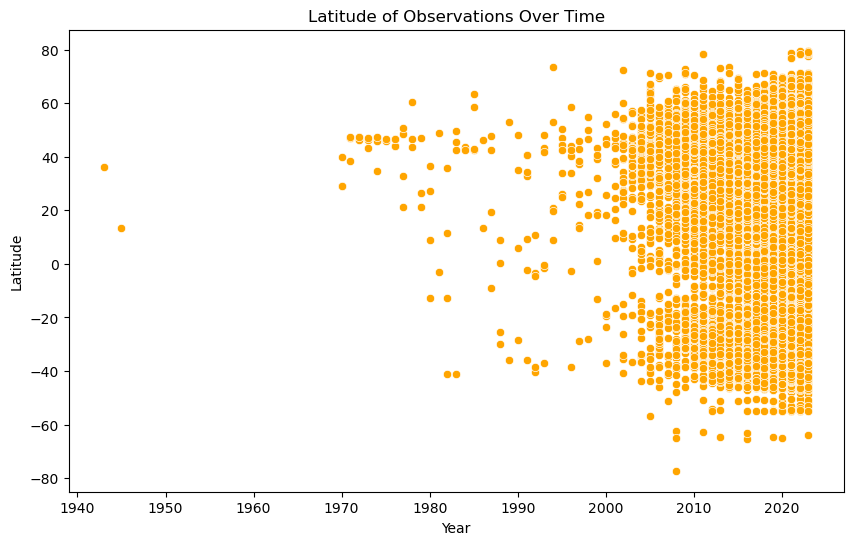

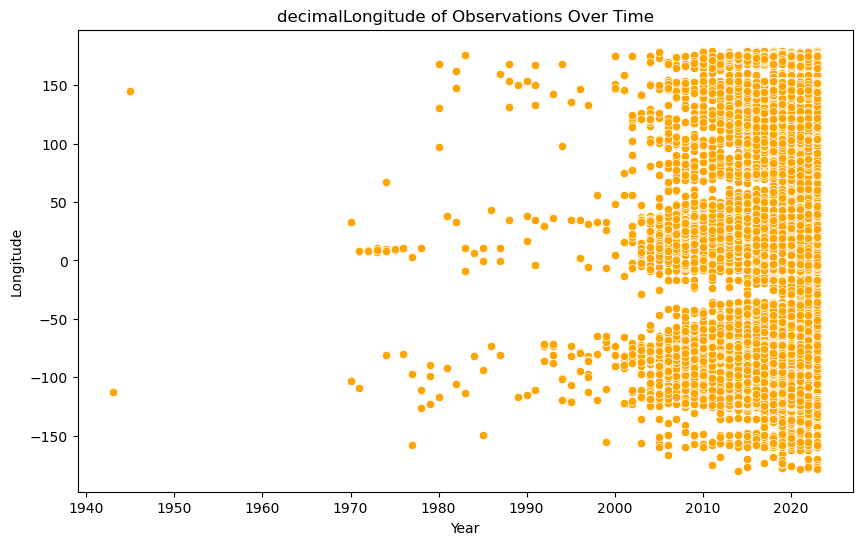

In [126]:
# Scatter Plot of Latitude and Longitude (Geographical Visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='decimalLongitude', y='decimalLatitude', data=data_cleaned, alpha=0.3,color = "green")
plt.title('Geographical Distribution of Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Relationship Between Year and Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='decimalLatitude', data=data_cleaned,color = "orange")
plt.title('Latitude of Observations Over Time')
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.show()


# Relationship Between Year and Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='decimalLongitude', data=data_cleaned,color = "orange")
plt.title('decimalLongitude of Observations Over Time')
plt.xlabel('Year')
plt.ylabel('Longitude')
plt.show()

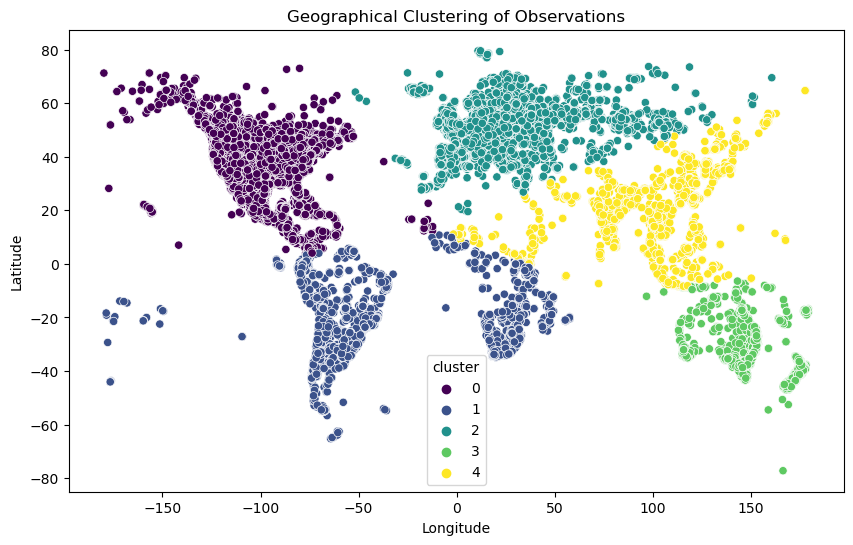

In [134]:
# --- Clustering ---

# Preprocessing: Standardize latitude and longitude for clustering
geo_data = data_cleaned[['decimalLatitude', 'decimalLongitude']].dropna()
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_data)

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(geo_scaled)

# Add clusters back to the original data
geo_data['cluster'] = clusters

# 10. Visualize Clusters on Geographical Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=geo_data['decimalLongitude'], y=geo_data['decimalLatitude'], hue=geo_data['cluster'], palette='viridis')
plt.title('Geographical Clustering of Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

it will display a scatter plot showing the geographical clustering of observations, where different colors represent different clusters. This visualization can help you understand spatial patterns in your data.

<a id='correlation-numerical'></a>
### Correlations of Numerical Features

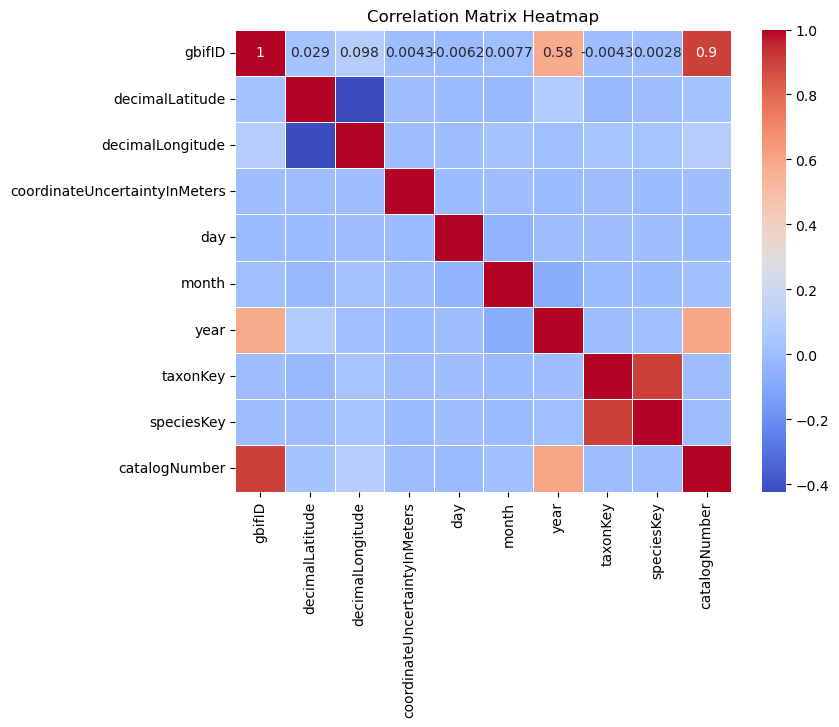

In [141]:
correlation_matrix = data_cleaned.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix shows strong multicollinearity among several features. Specifically:

- `taxonKey`, `speciesKey`,  have very high correlations , indicating they carry almost identical information.
- `engine_size` and `cylinders` are also highly correlated (0.93).
- `co2_emissions` has strong positive correlations with `fuel_cons_comb`, `fuel_cons_city`, and `engine_size` (0.85 and above), indicating these features are important for predicting CO2 emissions.
- `fuel_cons_mpg` shows high negative correlations with other fuel consumption measures (-0.93 and above), as higher mpg indicates lower fuel consumption.

These findings suggest that removing some highly correlated features can help reduce multicollinearity and improve model performance.

In [ ]:
# Pairplot for the dataframe

sns.pairplot(data_cleaned,
             kind="reg",
             diag_kind="kde", 
             plot_kws={"line_kws": {"color": "red"}}
            )